In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


In [0]:
#Load data stored on my GH Repo
url = 'https://raw.githubusercontent.com/miguelpantoja89/Python_Machine_Learning/master/Scikit_Learning/wine-quality.csv' 
wine = pd.read_csv(url)

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
bins=(2,6.5,8)
group_names=['bad','good']
wine['quality']= pd.cut( wine['quality'],bins=bins,labels=group_names)
wine['quality'].unique()

[bad, good, NaN]
Categories (2, object): [bad < good]

In [0]:
label_quality= LabelEncoder()


In [0]:
wine['quality']= label_quality.fit_transform(wine['quality'].astype(str))

In [7]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [9]:
wine['quality'].value_counts()

0    3838
1    1055
2       5
Name: quality, dtype: int64

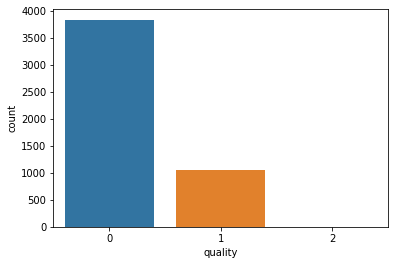

In [10]:
#Ploting Quality
sns.countplot(wine['quality'])

In [0]:
x= wine.drop('quality', axis=1)
y = wine['quality']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [0]:
sc = StandardScaler()


In [0]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


# Forest Classifier


In [0]:
rfc = RandomForestClassifier(n_estimators=200)


In [0]:
rfc.fit(x_train,y_train)
pred_rfc= rfc.predict(x_test)

In [23]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       753
           1       0.82      0.59      0.68       227

    accuracy                           0.87       980
   macro avg       0.85      0.77      0.80       980
weighted avg       0.87      0.87      0.87       980

[[724  29]
 [ 94 133]]


#SVM Classifier

In [0]:
sv = svm.SVC()


In [0]:
sv.fit(x_train,y_train)
pred_sv = sv.predict(x_test)

In [27]:
print(classification_report(y_test, pred_sv))
print(confusion_matrix(y_test,pred_sv))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       753
           1       0.75      0.34      0.47       227

    accuracy                           0.82       980
   macro avg       0.79      0.65      0.68       980
weighted avg       0.81      0.82      0.79       980

[[727  26]
 [149  78]]


#NEURAL NETWORK

In [0]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)

In [0]:
mlpc.fit(x_train,y_train)
pred_mlpc= mlpc.predict(x_test)

In [31]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       753
           1       0.67      0.49      0.57       227

    accuracy                           0.83       980
   macro avg       0.77      0.71      0.73       980
weighted avg       0.81      0.83      0.82       980

[[699  54]
 [116 111]]
